In [1504]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, classification_report, mean_absolute_error, mean_squared_error, r2_score

Importing Data:

In [1505]:
df = pd.read_csv(r"C:\Users\UMER\Documents\UNI_WORK\DSc_Class\Project\IMDb_Movies_India.csv", encoding='latin1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


Data Analysis:

In [1506]:
df.shape

(15509, 10)

In [1507]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [1508]:
df.describe(include='O')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Mamta,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


In [1509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [1510]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


Data Processing:

In [1511]:
df.dropna(inplace=True)

In [1512]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [1513]:
duplicate = df[df.duplicated(subset = ['Name', 'Year'])]
print("Duplicate rows:")
duplicate.head()

Duplicate rows:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
6063,India's Daughter,(2015),120 min,"Action, Crime, Drama",6.9,21,Rupesh Paul,Omkar Das Manikpuri,Amann Grewal,Vishal Om Prakash
12421,Sant Dnyaneshwar,(1940),137 min,Biography,8.1,9,Vishnupant Govind Damle,Sheikh Fattelal,Shahu Modak,Datta Dharmadhikari


In [1514]:
df.drop_duplicates(subset=['Name', 'Year'], inplace=True)

In [1515]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [1516]:
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(r' min', '', regex=True))

In [1517]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

In [1518]:
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [1519]:
df.drop_duplicates(subset=['Name', 'Year'], inplace=True)

In [1520]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,Drama,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,Horror,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,Biography,6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,Action,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


Data Visualisation:

In [1521]:
df.shape

(5657, 10)

In [1522]:
df.describe()

,Year,Duration,Rating,Votes
count,5657.000000,5657.00000,5657.000000,5657.00000
mean,1996.254198,133.44087,5.897967,2698.59802
std,19.729583,25.32374,1.381035,13653.82378
min,1931.000000,21.00000,1.100000,5.00000
25%,1983.000000,119.00000,5.000000,30.00000
50%,2002.000000,135.00000,6.100000,131.00000
75%,2013.000000,150.00000,6.900000,923.00000
max,2021.000000,321.00000,10.000000,591417.00000


In [1523]:
df.describe(include='O')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,5657,5657,5657,5657,5657,5657
unique,5385,20,2431,1960,2320,2555
top,Guru,Drama,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,1842,41,104,52,57


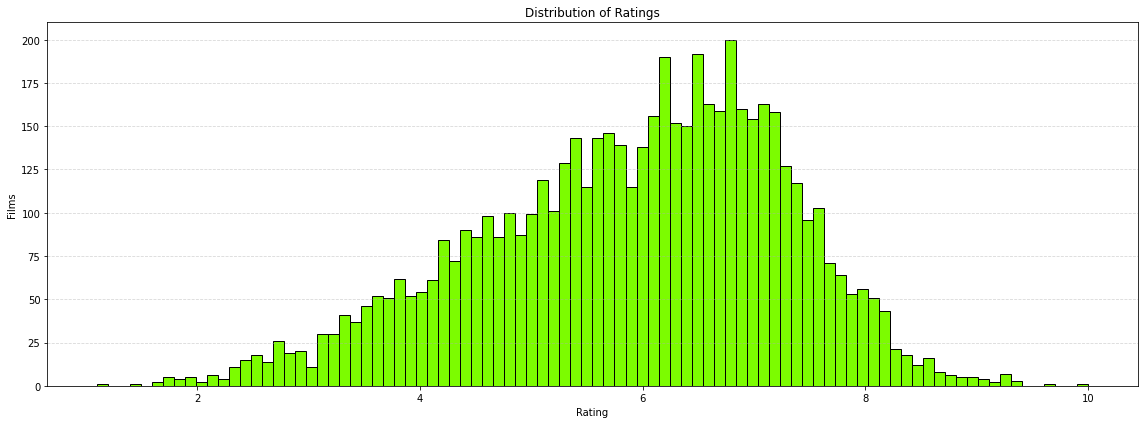

In [1542]:
plt.figure(figsize=(16, 6))
plt.hist(df['Rating'], bins=90,color = "lawngreen", edgecolor = 'black')
plt.xlabel('Rating')
plt.ylabel('Films')
plt.title('Distribution of Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

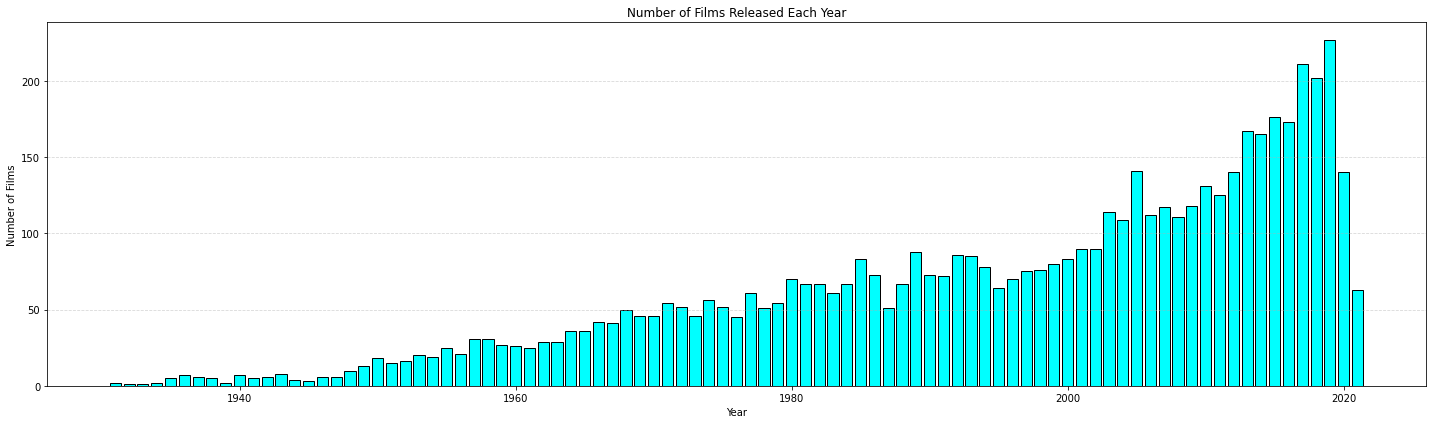

In [1541]:
movies_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(20, 6))
plt.bar(movies_per_year.index, movies_per_year.values, color = "cyan", edgecolor = "black")
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.title('Number of Films Released Each Year')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

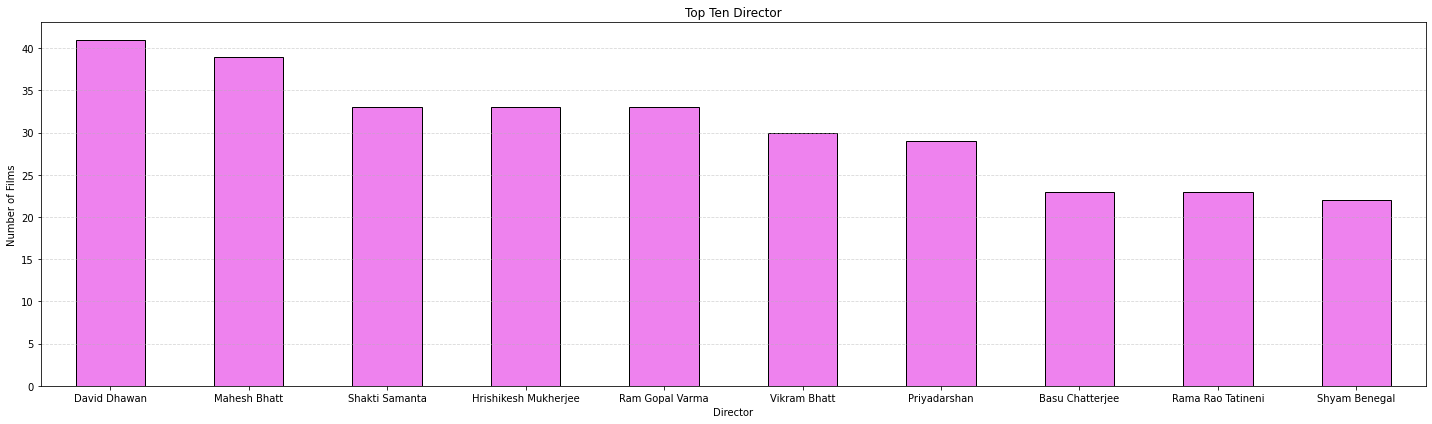

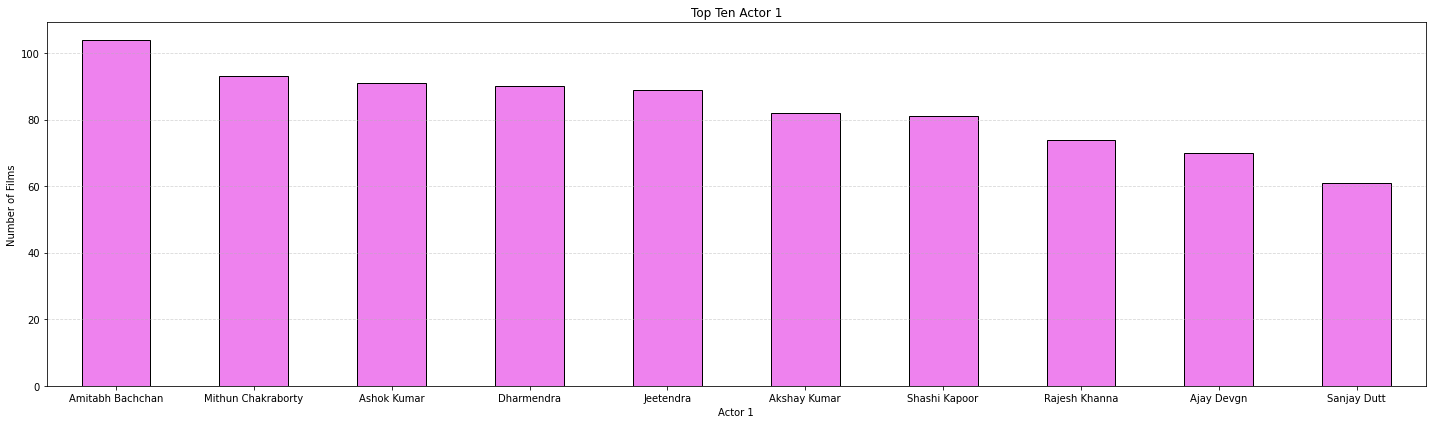

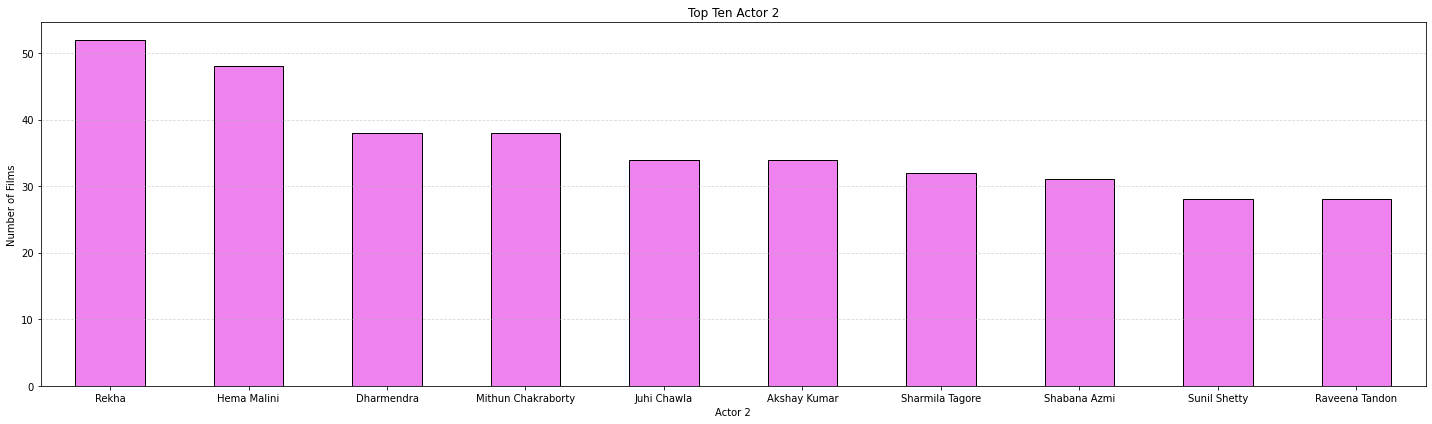

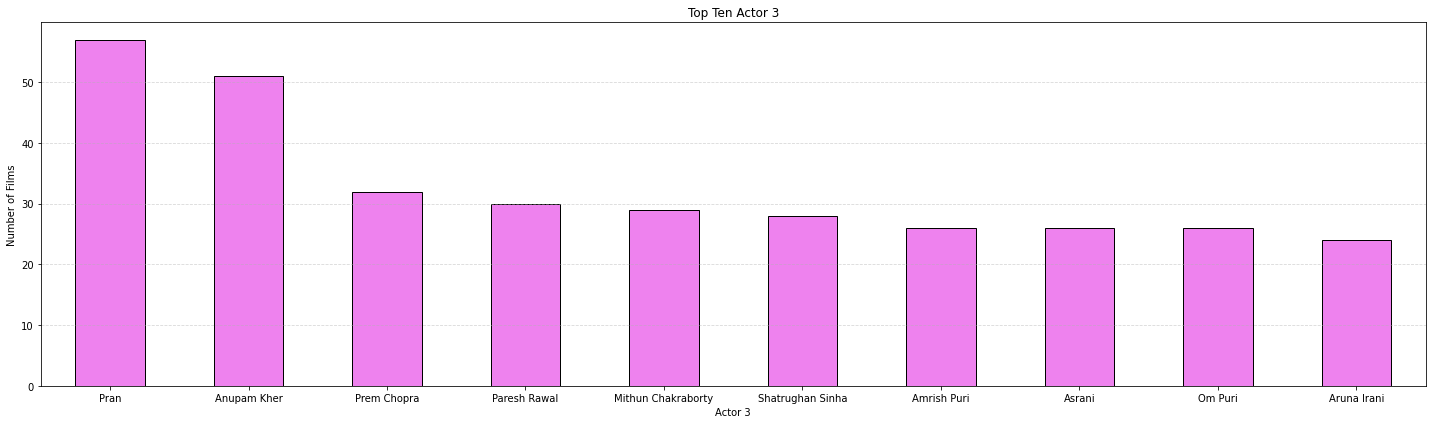

In [1543]:
def Top(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6),color="violet", edgecolor="black")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Number of Films")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Top("Director")
Top("Actor 1")
Top("Actor 2")
Top("Actor 3")

Model Training:

In [1527]:
df.drop('Name', axis = 1, inplace = True)

In [1528]:
genre_mean = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean'] = genre_mean

director_mean = df.groupby('Director')['Rating'].transform('mean')
df['Director_mean'] = director_mean

actor1_mean = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_mean'] = actor1_mean

actor2_mean = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_mean'] = actor2_mean

actor3_mean = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_mean'] = actor3_mean

In [1529]:
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean','Director_mean','Actor1_mean', 'Actor2_mean', 'Actor3_mean']]
y = df['Rating']

In [1530]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [1531]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)

In [1532]:
print('The performance evaluation of Random Forest Regressor is below: ', '\n')
mse = mean_squared_error(y_test, predictions)
print('Mean squared error: ',mse)
mae = mean_absolute_error(y_test, predictions)
print('Mean absolute error: ',mae)
score = rf.score(X_test, y_test)
print(f'R2 Score:: {score}')

The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.34630569199057715
Mean absolute error:  0.39851177856301534
R2 Score:: 0.8216844806605321


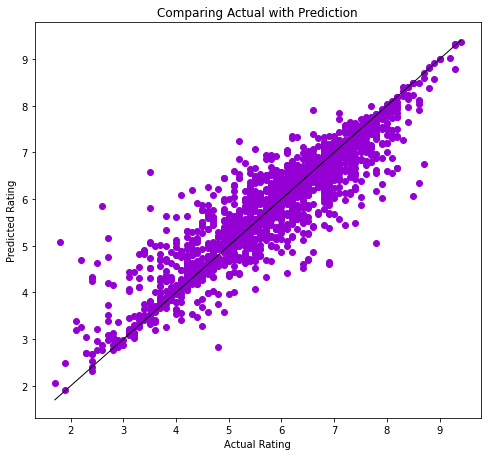

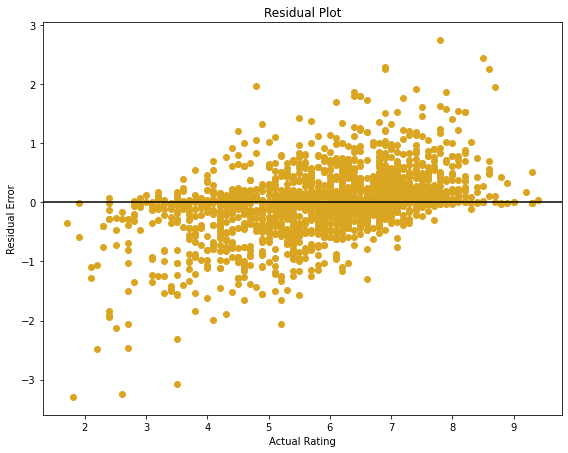

In [1533]:
plt.figure(figsize=(8, 16))
plt.subplot(2,1,1)
plt.scatter(y_test, predictions, color='darkviolet')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Comparing Actual with Prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=1)

residuals = y_test - predictions
plt.figure(figsize=(8, 12))
plt.subplot(2,1,2)
plt.scatter(y_test, residuals, color='goldenrod')
plt.xlabel('Actual Rating')
plt.ylabel('Residual Error')
plt.title('Residual Plot')
plt.axhline(y=0, color='black', linestyle='-')
plt.tight_layout()
plt.show()

In [1534]:
data = {'Year': [2005], 'Votes': [1002], 'Duration': [116], 'Genre_mean_rating': [6.4], 'Director_encoded': [6.5], 'Actor1_encoded': [6.9], 'Actor2_encoded': [6.8], 'Actor3_encoded': [5.700]}
pred_df = pd.DataFrame(data)

predicted_rating = rf.predict(pred_df)
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 6.684000000000002
